In [ ]:
 pip install nltk

In [ ]:
pip install newspaper3k

In [ ]:
#import libraries
from newspaper import Article
import random
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install fontstyle --upgrade
import fontstyle

Requirement already up-to-date: fontstyle in /usr/local/lib/python3.7/dist-packages (1.0.1.2)


In [ ]:
nltk.download('punkt',quiet=True)

True

In [ ]:
article = Article('https://agritech.tnau.ac.in/agricultural_marketing/agrimark_India.html')
article.download()
article.parse()
article.nlp()
agri = article.text

In [ ]:
print(agri)


Agricultural Marketing in India

Agricultural Marketing in Tamilnadu Agricultural Marketing in India India is an agricultural country and one third population depends on the agricultural sector directly or indirectly. Agriculture remains as the main stray of the Indian economy since times immemorial. Indian agriculture contribution to the national gross domestic product (GDP) is about 25 per cent. With food being the crowning need of mankind, much emphasis has been on commercialising agricultural production. For this reason, adequate production and even distribution of food has of late become a high priority global concern. Agricultural marketing is mainly the buying and selling of agricultural products. In earlier days when the village economy was more or less self-sufficient the marketing of agricultural products presented no difficulty as the farmer sold his produce to the consumer on a cash or barter basis. Today's agricultural marketing has to undergo a series of exchanges or tran

In [ ]:
#tokenization
text = agri
sentence_list = nltk.sent_tokenize(text) 


In [ ]:
print(sentence_list)

['Agricultural Marketing in India\n\nAgricultural Marketing in Tamilnadu Agricultural Marketing in India India is an agricultural country and one third population depends on the agricultural sector directly or indirectly.', 'Agriculture remains as the main stray of the Indian economy since times immemorial.', 'Indian agriculture contribution to the national gross domestic product (GDP) is about 25 per cent.', 'With food being the crowning need of mankind, much emphasis has been on commercialising agricultural production.', 'For this reason, adequate production and even distribution of food has of late become a high priority global concern.', 'Agricultural marketing is mainly the buying and selling of agricultural products.', 'In earlier days when the village economy was more or less self-sufficient the marketing of agricultural products presented no difficulty as the farmer sold his produce to the consumer on a cash or barter basis.', "Today's agricultural marketing has to undergo a se

In [ ]:
# function to return random greeting response
def greeting_response(text):
  text = text.lower()

  #bots greetinng response
  bot_greetings = ['Hi there, how can we help you today?','Hi, Good to see you, do you need something?','Hey! Can I help you with something?','Hey! I am glad that you are here. Please tell me, how can I help you?']
  #users greetings
  user_greetings= ['hi','hellooo','hello','greetings','wassup']

  for word in text.split():
    if word in user_greetings:
      return random.choice(bot_greetings)

In [ ]:
# function to return random goodbye response
def goodbye_response(text):
  text = text.lower()

  #bots goodbye response
  bot_goodbye = ['Bye!Have a good day!','Goodbye','Come visit us again.Bye-Bye!','See you later!']
  #users goodbye
  user_goodbye= ['bye','byee','goodbye','adios']

  for word in text.split():
    if word in user_goodbye:
      return random.choice(bot_goodbye)

In [ ]:
# function to return for unmatched statements
def idk_response(text):
  text = text.lower()

  #bots idk response

  bot_idk = ["What did you say?","I don't understand.","Excuse me, I didn't get it.","Excuse me, can you please repeat it?","Sorry, I did not catch that.","I missed that.","I don't get it.","I’m afraid it is not clear what you saying.","I am sorry, but I don’t follow what you are saying.","I don’t catch what you said.Sorry."]

  return random.choice(bot_idk)

In [ ]:
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0, length))

  x = list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > x[list_index[j]]:
        #swap
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp

  return list_index

In [ ]:
# create bot response
def bot_response(user_input):
  user_input = user_input.lower()
  sentence_list.append(user_input)
  bot_response = ''
  cm = CountVectorizer().fit_transform(sentence_list)
  similarity_scores = cosine_similarity(cm[-1],cm)
  similarity_scores_list = similarity_scores.flatten()
  index = index_sort(similarity_scores_list)
  index = index[1:]
  response_flag = 0

  j = 0
  for i in range(len(index)):
    if similarity_scores_list[index[i]] > 0.0:
      colour = '\33[34m'
      bot_response = (fontstyle.apply('\33[34m' "Agri bot: "  + sentence_list[index[i]],'bold/Italic'))
      response_flag = 1
      j = j+1
    if j >2:
      break

  if response_flag == 0:
    color = '\33[32m'
    bot_response = (fontstyle.apply('\33[32m' "Agri bot: " + idk_response(user_input),'bold/Italic'))

  sentence_list.remove(user_input)

  return bot_response




In [ ]:
from google.colab import files
from IPython import display

In [ ]:
uploaded=files.upload()

Saving agribot.jpg to agribot (5).jpg


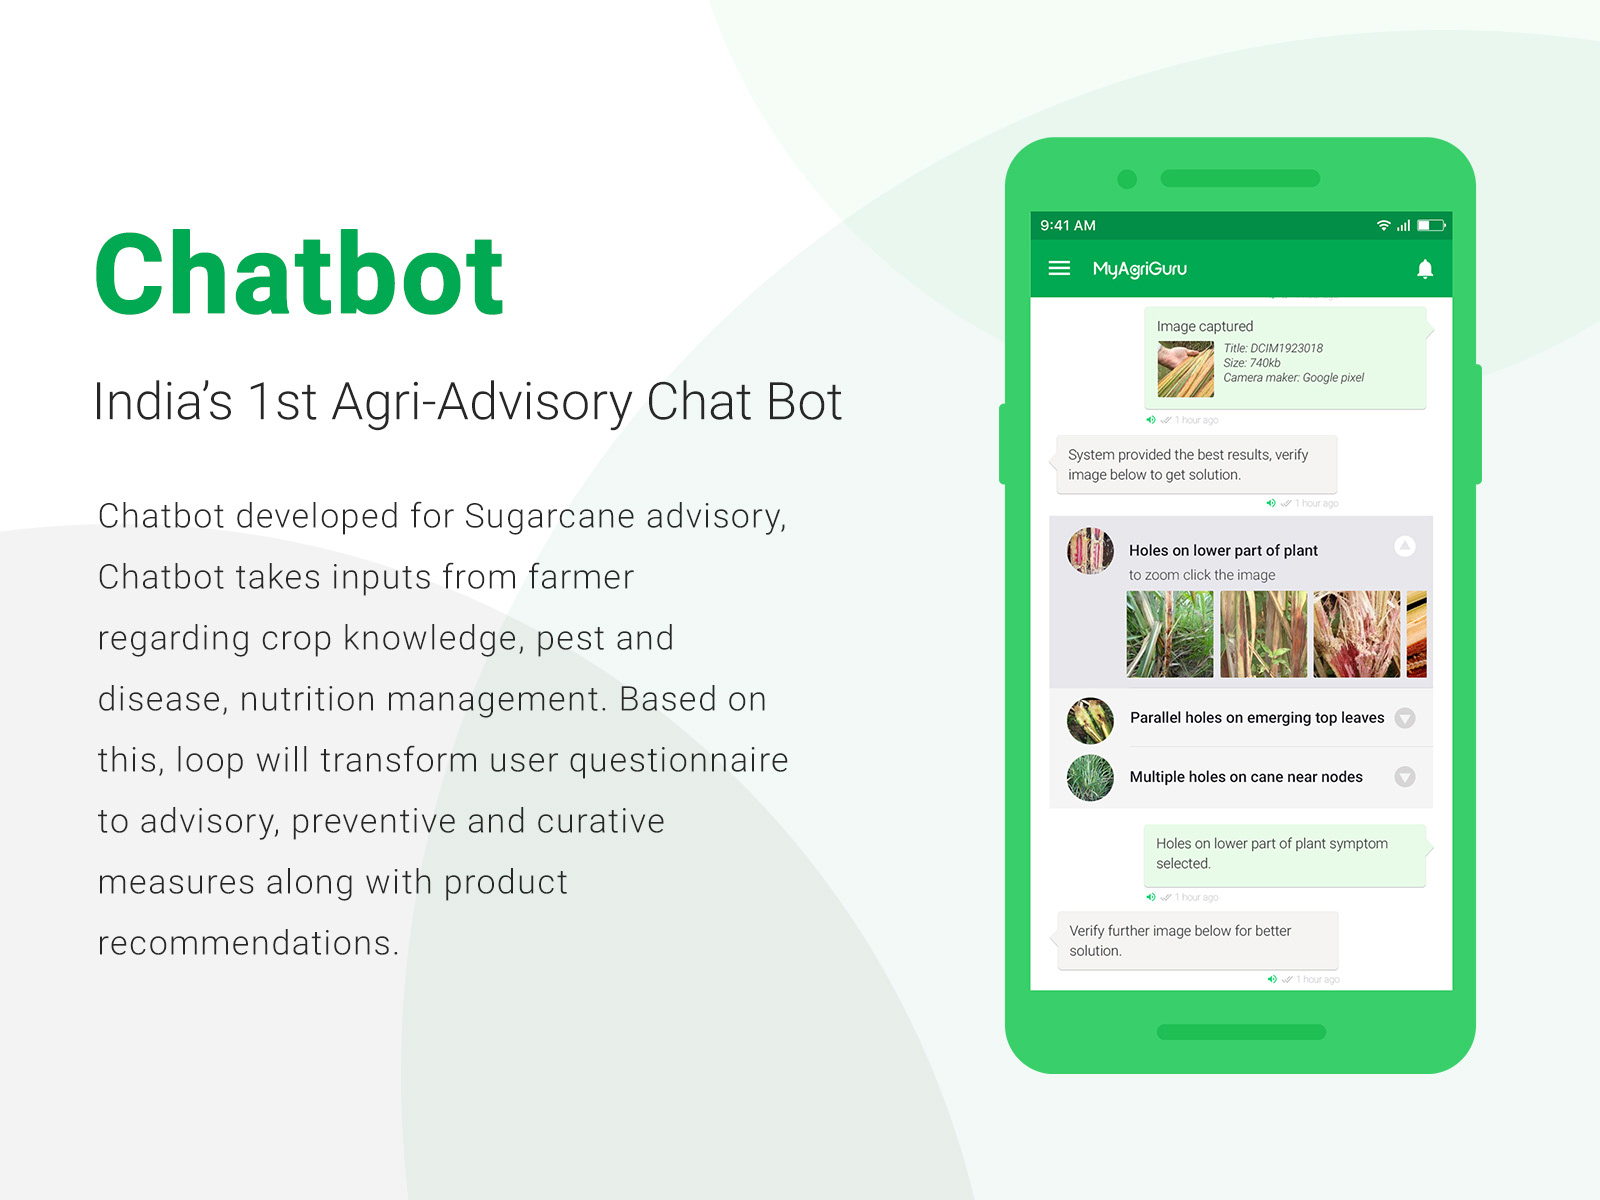

In [ ]:
display.Image("agribot.jpg",width=500)

Agri Bot: I am Agri bot. I will answer your queries. If u want to exit please type: bye
hi
Agri bot: Hi there, how can we help you today?
byee
Agri bot: See you later!


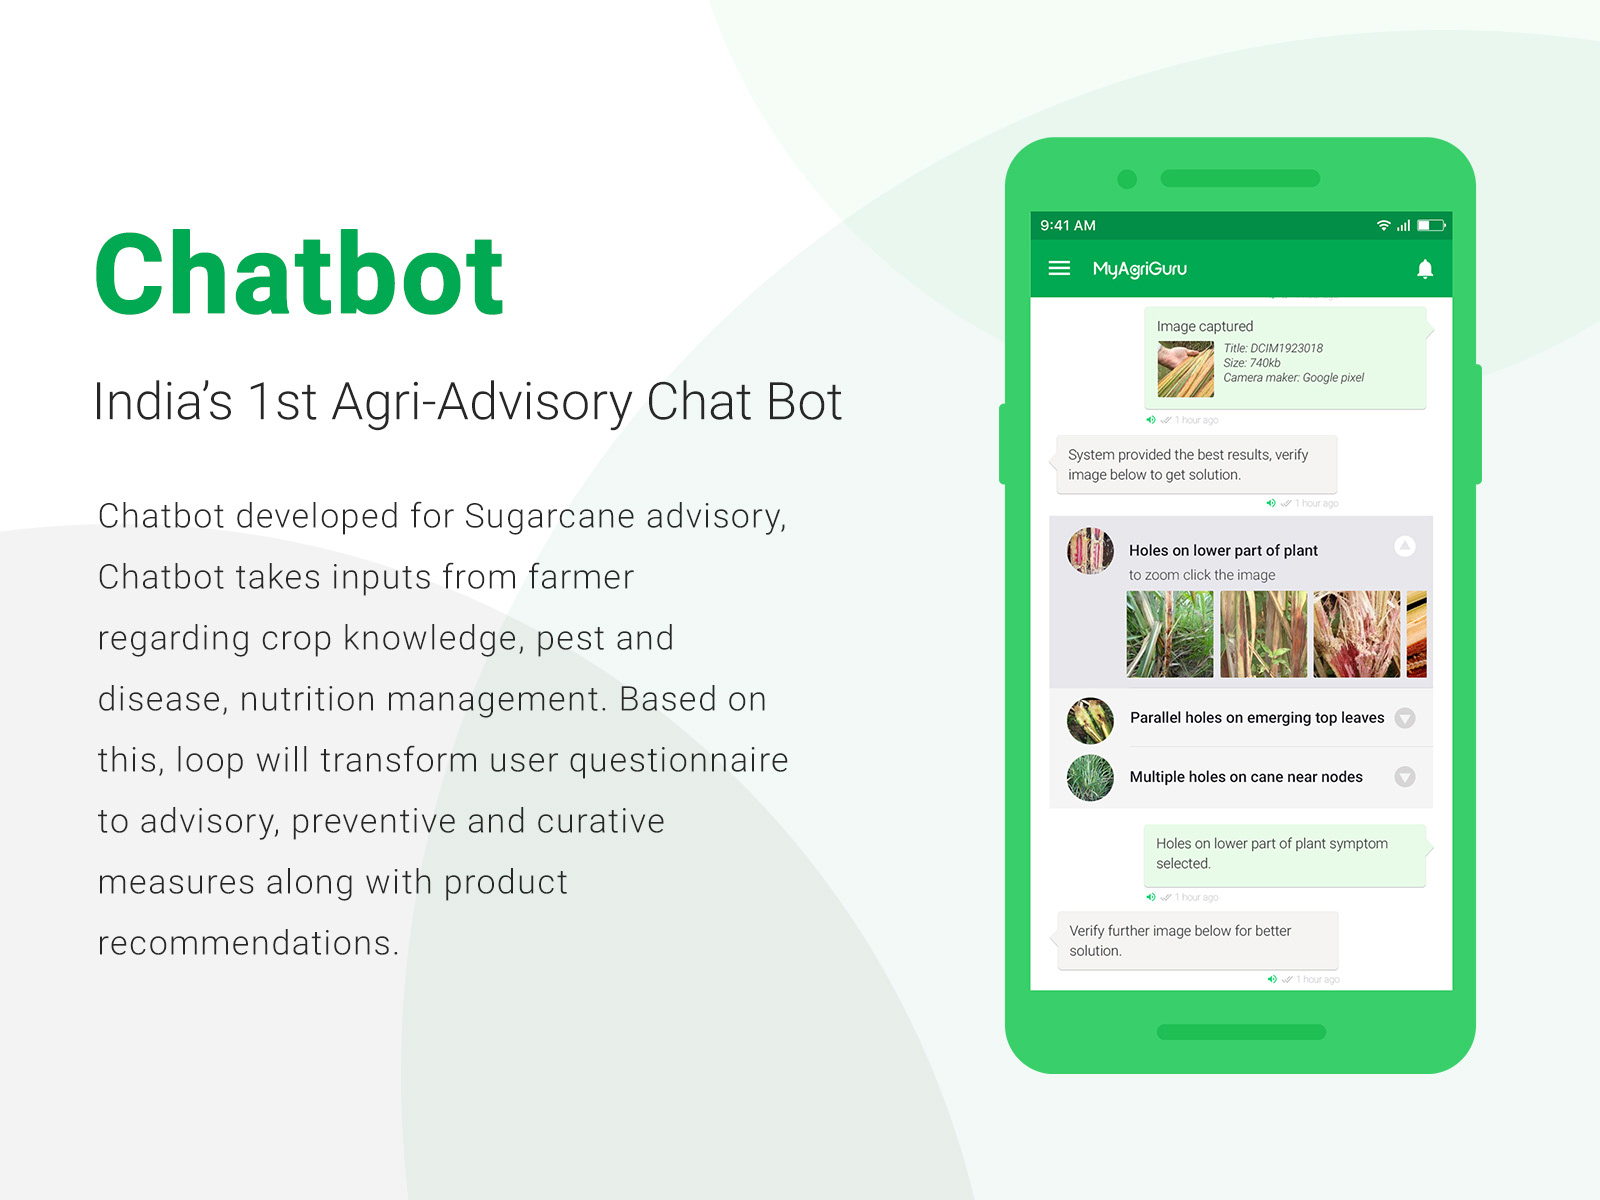

In [ ]:
#start chat

Red_Font = '\33[31m'
print("WELCOME ")
print(Red_Font + fontstyle.apply("\033[3mAgri Bot: I am Agri bot. I will answer your queries. If u want to exit please type: bye",'bold/Italic'))


while(True):
  user_input = input()
  
  if goodbye_response(user_input) != None :
    print(fontstyle.apply('\33[33m' "Agri bot: "+goodbye_response(user_input),'bold/Italic'))
    break
  else:
    if greeting_response(user_input) != None :

      print(fontstyle.apply('\33[36m' "Agri bot: "+ greeting_response(user_input),'bold/Italic'))
    else:
      print(bot_response(user_input))

display.Image("agribot.jpg",width=500)